In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
crimeratedata = pd.read_csv('burglary.csv')
crimeratedata.head()

,state_abbr,year,population,burglary,crime_rate
0,NJ,1995,7945000,69533,0.875179
1,NJ,1996,7988000,63259,0.791925
2,NJ,1997,8053000,60894,0.756165
3,NJ,1998,8115000,54459,0.671091
4,NJ,1999,8143412,46998,0.577129


In [8]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = crimeratedata.year.values.reshape(-1, 1)
y = crimeratedata.crime_rate.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (25, 1) (25, 1)


array([[1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

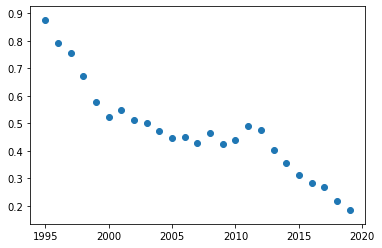

In [9]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [10]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [11]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [12]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 0.0064785952572970346
R-squared (R2 ): 0.7989013024534104


In [14]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.7989013024534104

In [15]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8735034991414321
Testing Score: 0.7989013024534104


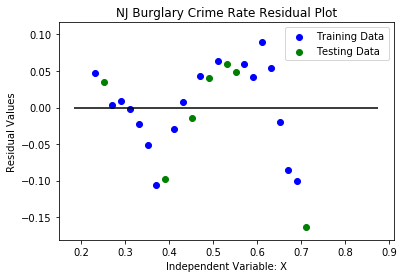

In [16]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="green", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("NJ Burglary Crime Rate Residual Plot")
plt.xlabel('Independent Variable: X')
plt.ylabel('Residual Values')
plt.savefig('burglary_residualplot.png')
### END SOLUTION

In [17]:
# This residual plot gives an visual understanding of how "good" your predicted values are. 
# Positive values for the residual (on the y-axis) mean the prediction was too low. 
# Negative values mean the prediction was too high. 
# 0 means the guess was exactly correct.

In [18]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1995]]
Max X Value: [[2019]]


In [19]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

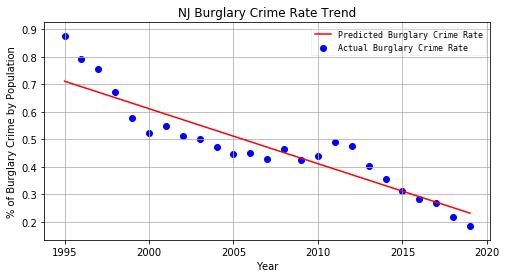

In [20]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.title("NJ Burglary Crime Rate Trend")
plt.xlabel("Year")
plt.ylabel("% of Burglary Crime by Population")
plt.grid(True)
plt.gcf().set_size_inches(8,4)
plt.legend(('Predicted Burglary Crime Rate', 'Actual Burglary Crime Rate'), loc='best', framealpha=0.25, prop={'size':'small', 'family':'monospace'})
plt.savefig('burglary_trend.png')
### END SOLUTION

In [21]:
prediction = model.predict([[2000]])
prediction

array([[0.6112383]])

In [22]:
prediction1 = model.predict([[2005]])
prediction1

array([[0.5113448]])

In [23]:
prediction2 = model.predict([[2020]])
prediction2

array([[0.21166431]])

In [24]:
prediction3 = model.predict([[2025]])
prediction3

array([[0.11177082]])

In [25]:
prediction4 = model.predict([[2010]])
prediction4

array([[0.41145131]])

In [26]:
prediction5 = model.predict([[2015]])
prediction5

array([[0.31155781]])